In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, simps
from scipy.optimize import bisect

In [2]:
def shoot(pot,x,E,oe=0):
    r=[0,1]
    def f(r,x,E):
        sai,dsai=r
        dpsi=dsai
        dpsid=pot(x,E)*sai
        return np.array([dpsi, dpsid],float)
    def shooting(E):
        return odeint(f,r,x,args=(E,))[-1,1 if oe ==1 else 0]

    sai=[shooting(i) for i in E]
    '''
    fig=plt.figure(figsize=(8,4))
    plt.plot(E,sai,'k.--')
    plt.hlines(y=0,xmin=E[0],xmax=E[-1],color='r')
    plt.show()
    '''
    t=E[np.where(np.diff(np.sign(sai))!=0)]
    ecr=[bisect(shooting,j-dE,j+dE) for j in t]
    print('Eigenvalues are:','\n',np.array(ecr))
    return f,ecr

## Infinite well Problem

Eigenvalues are: 
 [  9.86960456  39.47841877  88.82643303 157.91366446 246.74010231]


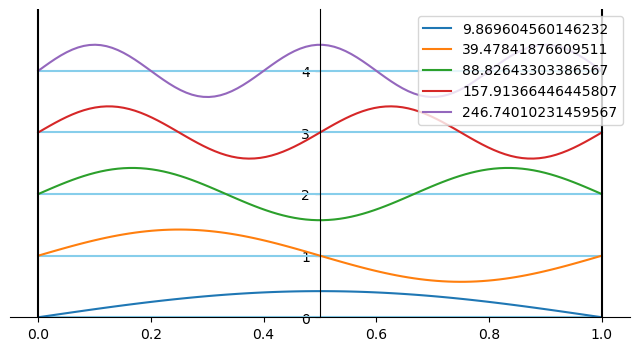

In [28]:
x=np.linspace(0,1,100)
E,dE=np.linspace(0,300,100,retstep=True)
r=[0,1]
def pot(x,E):
    return -E
f,ecr=shoot(pot,x,E)
p=0
fig=plt.figure(figsize=(8,4))
for c in range(len(ecr)):
    y=odeint(f,r,x,args=(ecr[c],))
    y=y[:,0]
    y=y/np.sqrt(simps(y*y,x))
    plt.hlines(p,x[0],x[-1],'skyblue')
    plt.plot(x,0.3*y+p,label=(str(ecr[c])))
    p=p+1 
plt.legend()
plt.ylim(0,p)
plt.gca().spines['left'].set_position('center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.vlines([0,1],0,p,'k')
plt.yticks(np.arange(p))
plt.show()

## Harmonic Potential

For Even states
Eigenvalues are: 
 [1.00000002 5.00000017 9.00002531]
For odd states
Eigenvalues are: 
 [3.         7.00000247]


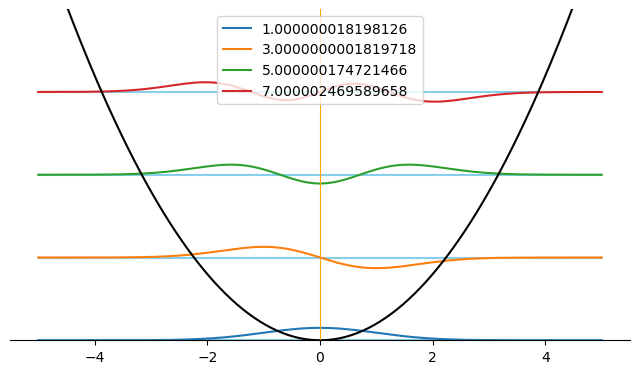

In [29]:
def V(x,E):
    return x**2-E
L=5

x=np.linspace(-L,0,100)
E,dE=np.linspace(0,10,100,retstep=True)
print('For Even states')
f,ecr1=shoot(V,x,E,oe=1)
print('For odd states')
f,ecr2=shoot(V,x,E,oe=-1)

Ecr=[]
for i in range(len(ecr2)):
    Ecr.append(ecr1[i])
    Ecr.append(ecr2[i])
X=np.linspace(-L,L,199)
fig=plt.figure(figsize=(8,4.3))
p=0
for c in range(len(Ecr)):
    y=odeint(f,r,x,args=(Ecr[c],))
    y=np.vstack((y[:-1],(-1)**c*np.flipud(y)))[:,0]
    y=y/np.sqrt(simps(y*y,X))
    plt.hlines(p,X[0],X[-1],'skyblue')
    plt.plot(X,0.3*y+p,label=(str(Ecr[c])))
    p=p+1.5
plt.legend()
plt.ylim(0,p)
plt.gca().spines['left'].set_position('center')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(X,0.3*X**2,color='k')
plt.yticks([])
plt.show()

## Finite Well

For Even states
Eigenvalues are: 
 [-97.96209588 -81.75774434 -50.03076787  -6.27413659]
For odd states
Eigenvalues are: 
 [-91.86414563 -67.74659792 -29.04936605]


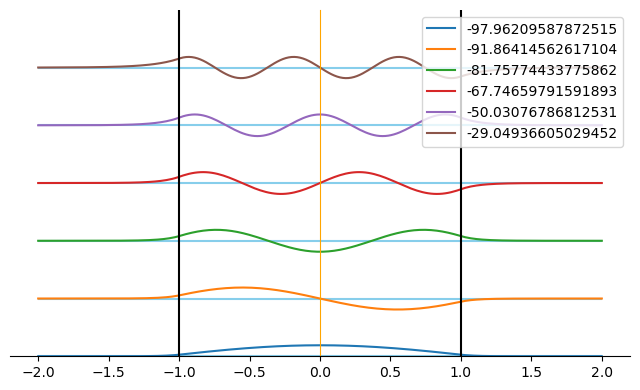

In [30]:
def V(x,E):
    v0=-100 if -1<x<1 else 0
    return v0-E
L=2

x=np.linspace(-L,0,100)
E,dE=np.linspace(-100,0,100,retstep=True)
print('For Even states')
f,ecr1=shoot(V,x,E,oe=1)
print('For odd states')
f,ecr2=shoot(V,x,E,oe=-1)

Ecr=[]
for i in range(len(ecr2)):
    Ecr.append(ecr1[i])
    Ecr.append(ecr2[i])
X=np.linspace(-L,L,199)
fig=plt.figure(figsize=(8,4.5))
p=0
for c in range(len(Ecr)):
    y=odeint(f,r,x,args=(Ecr[c],))
    y=np.vstack((y[:-1],(-1)**c*np.flipud(y)))[:,0]
    y=y/np.sqrt(simps(y*y,X))
    plt.hlines(p,X[0],X[-1],'skyblue')
    plt.plot(X,0.3*y+p,label=(str(Ecr[c])))
    p=p+1.5
plt.legend()
plt.ylim(0,p)
plt.gca().spines['left'].set_position('center')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.vlines([-1,1],0,p,'k')
plt.yticks([])
plt.show()

Eigenvalues are: 
 [-0.49997993 -0.1249975  -0.05542291 -0.02463858  0.01331558  0.06493647]
Eigenvalues are: 
 [-0.125      -0.05547128 -0.02591397  0.00921101  0.05739316]
Eigenvalues are: 
 [-0.05552808 -0.02796897  0.0022674   0.04503359  0.09995141]


<Figure size 800x450 with 0 Axes>

<Figure size 800x450 with 0 Axes>

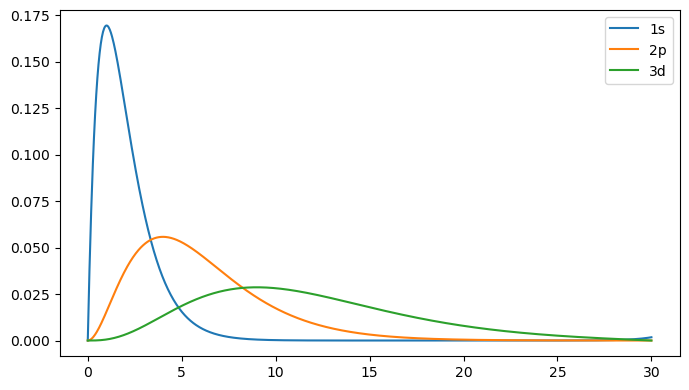

In [6]:
z=1
L=30
x1=np.linspace(1e-5,L,1000)
r=[0,1]
E,dE=np.linspace(-10,0.1,1000,retstep=True)
ls=[0,1,2]
Y1=[]
for l in ls:
    def pot(x,E):
        return (l*(l+1)/x**2-2*z/x-2*E)
    f,ecr=shoot(pot,x1,E)
    p=0
    fig=plt.figure(figsize=(8,4.5))
    c=0
    y=odeint(f,r,x1,args=(ecr[c],))
    y=y[:,0]
    Y1.append(y/np.sqrt(simps(4*np.pi*x1*y*y,x1)))
    #y=y/x
[plt.plot(x1,j) for j in Y1]
plt.legend(['1s','2p','3d'])  
plt.show()

Eigenvalues are: 
 [-1.99984007 -0.49997785 -0.21664039 -0.03717785]
Eigenvalues are: 
 [-0.49999914 -0.21844662 -0.05313716]
Eigenvalues are: 
 [-0.22082339 -0.07894462]


<Figure size 800x450 with 0 Axes>

<Figure size 800x450 with 0 Axes>

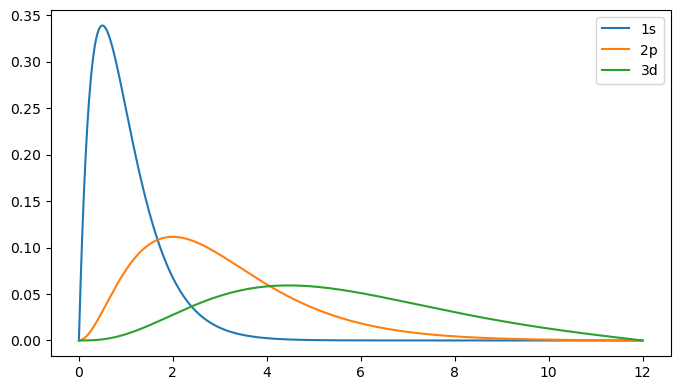

In [7]:
z=2
L=12
x2=np.linspace(1e-5,L,1000)
r=[0,1]
E,dE=np.linspace(-10,0.1,1000,retstep=True)
ls=[0,1,2]
Y2=[]
for l in ls:
    def pot(x,E):
        return (l*(l+1)/x**2-2*z/x-2*E)
    f,ecr=shoot(pot,x2,E)
    p=0
    fig=plt.figure(figsize=(8,4.5))
    c=0
    y=odeint(f,r,x2,args=(ecr[c],))
    y=y[:,0]
    Y2.append(y/np.sqrt(simps(4*np.pi*x2*y*y,x2)))
    #y=y/x
[plt.plot(x2,j) for j in Y2]
plt.legend(['1s','2p','3d']) 
plt.show()

Eigenvalues are: 
 [-7.99871965 -1.99983998 -0.88794815 -0.43041547  0.09052085]
Eigenvalues are: 
 [-2.         -0.88832845 -0.44423793  0.03990871]
Eigenvalues are: 
 [-0.88871269 -0.46628934 -0.04654482]


<Figure size 800x450 with 0 Axes>

<Figure size 800x450 with 0 Axes>

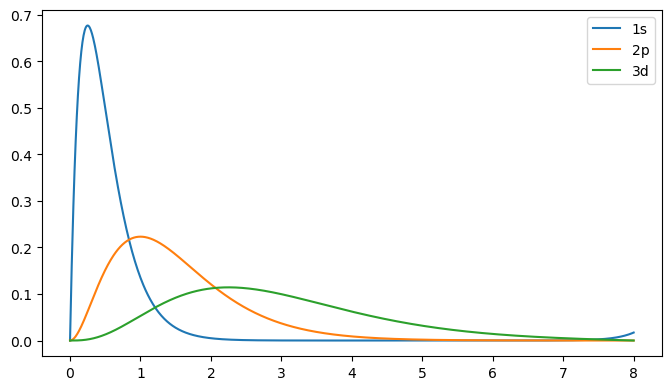

In [8]:
z=4
L=8
x4=np.linspace(1e-5,L,1000)
r=[0,1]
E,dE=np.linspace(-10,0.1,1000,retstep=True)
ls=[0,1,2]
Y4=[]
for l in ls:
    def pot(x,E):
        return (l*(l+1)/x**2-2*z/x-2*E)
    f,ecr=shoot(pot,x4,E)
    p=0
    fig=plt.figure(figsize=(8,4.5))
    c=0
    y=odeint(f,r,x4,args=(ecr[c],))
    y=y[:,0]
    Y4.append(y/np.sqrt(simps(4*np.pi*x4*y*y,x4)))
    #y=y/x
[plt.plot(x4,j) for j in Y4]
plt.legend(['1s','2p','3d']) 
plt.show()

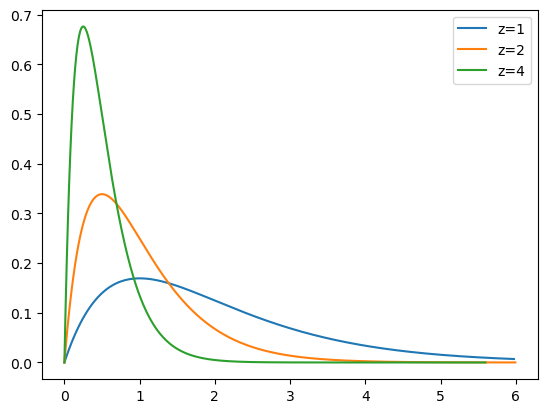

In [9]:
plt.plot(x1[:-800],Y1[0][:-800])
plt.plot(x2[:-500],Y2[0][:-500])
plt.plot(x4[:-300],Y4[0][:-300])
plt.legend(['z=1','z=2','z=4'])
plt.show()

Eigenvalues are: 
 [-1.90347117 -0.41338731 -0.12277801]
Eigenvalues are: 
 [-1.95076239 -0.45347116 -0.15601042]
Eigenvalues are: 
 [-1.97998909 -0.48051418 -0.18074121  0.08575816]


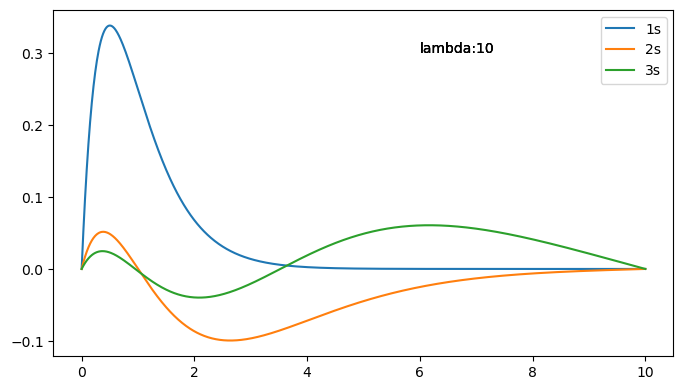

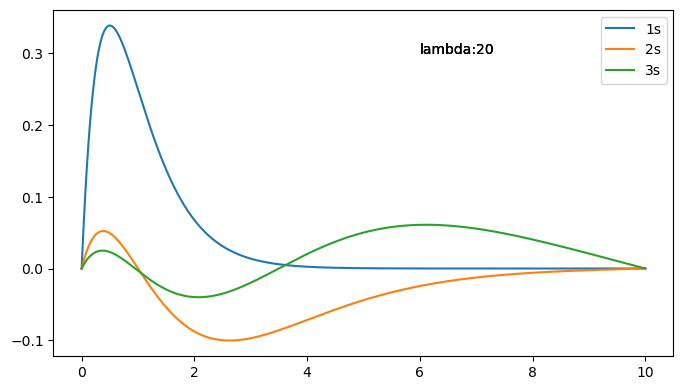

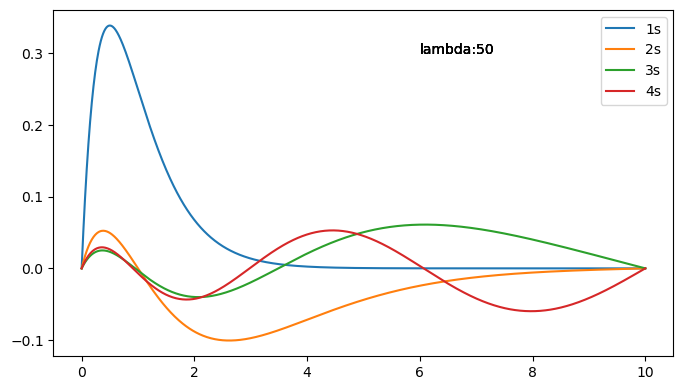

In [10]:
z=1
L=10
x1=np.linspace(1e-5,L,1000)
r=[0,1]
E,dE=np.linspace(-10,0.1,1000,retstep=True)
A=[10,20,50]
l=0
for a in A:
    def pot(x,E):
        return (l*(l+1)/x**2-2*np.exp(-x/a)/x-2*z/x-2*E)
    f,ecr=shoot(pot,x1,E)
    p=0
    fig=plt.figure(figsize=(8,4.5))
    for c in range(len(ecr)):
        y=odeint(f,r,x1,args=(ecr[c],))
        y=y[:,0]
        y=y/np.sqrt(simps(4*np.pi*x1*y*y,x1))
        #y=y/x
        plt.plot(x1,y)
        plt.legend(['1s','2s','3s','4s'])
        plt.text(6,0.3,'lambda:'+str(a))

In [11]:
z=1
L=10
x1=np.linspace(1e-5,L,1000)
r=[0,1]
E,dE=np.linspace(-10,0.1,1000,retstep=True)
a=10
ls=[0,1,2]
Y=[]
for l in ls:
    def pot(x,E):
        return (l*(l+1)/x**2-2*np.exp(-x/a)/x-2*z/x-2*E)
    f,ecr=shoot(pot,x1,E)
    p=0
    c=2-l
    y=odeint(f,r,x1,args=(ecr[c],))
    y=y[:,0]
    Y.append(y/np.sqrt(simps(4*np.pi*x1*y*y,x1)))

Eigenvalues are: 
 [-1.90347117 -0.41338731 -0.12277801]
Eigenvalues are: 
 [-0.41138533 -0.12857241]
Eigenvalues are: 
 [-0.13617739  0.05480944]


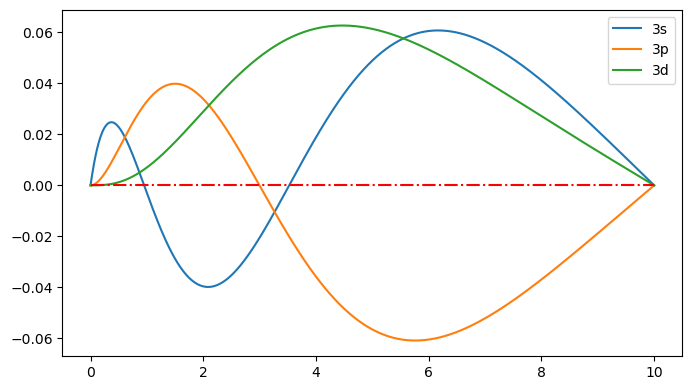

In [27]:
fig=plt.figure(figsize=(8,4.5))
[plt.plot(x1,j) for j in Y]
plt.legend(['3s','3p','3d'])
plt.hlines(0,0,10,linestyles='dashdot',color='red')
plt.show()